In [ ]:
!pip install --pre deepchem[tensorflow]

In [ ]:
import deepchem as dc
dc.__version__

In [59]:
import numpy as np

In [ ]:
!git clone https://github.com/dsalinasduron-msmary/chemical_informatics.git

In [ ]:
import os
import pickle

os.listdir()
os.chdir('chemical_informatics')
os.getcwd()

In [ ]:
f = open('ENSG00000128191dataframe.pickle','rb')
compound_dataset = pickle.load(f)
f.close()
display(compound_dataset)

In [ ]:
smiles = compound_dataset['smiles']
IC50 = compound_dataset['standard value']
featurizer = dc.feat.ConvMolFeaturizer()
compound_dataset['featurized'] = featurizer.featurize(smiles)
display(compound_dataset)

In [ ]:
compound_dataset['divided values'] = compound_dataset['standard value'].astype(float).div(108000)
display(compound_dataset)

In [ ]:
compound_dataset['pIC50'] = np.log10(compound_dataset['divided values'].astype(float)).mul(-1)

display(compound_dataset)

<Axes: >

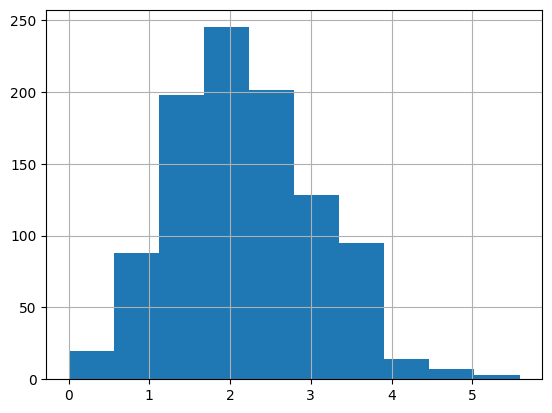

In [129]:
compound_dataset['pIC50'].hist()

In [ ]:
compound_dataset['number'] = list(range(0,len(compound_dataset)))
display(compound_dataset)

In [109]:
x = compound_dataset
f = open('x.pickle','wb')
pickle.dump(x,f)
f.close()

In [110]:
import pandas as pd
training_dataset = compound_dataset.sample(frac = 0.7)

In [111]:
#training_dataset.featurized[0].n_feat

75

In [ ]:
testing_dataset = (compound_dataset[~compound_dataset['number'].isin(training_dataset['number'])])
display(testing_dataset)

In [ ]:
numpy_training_dataset = dc.data.NumpyDataset(X=training_dataset['featurized'],y=training_dataset['pIC50'].astype(float), ids=training_dataset['smiles'])
numpy_testing_dataset = dc.data.NumpyDataset(X=testing_dataset['featurized'],y=testing_dataset['pIC50'].astype(float), ids=testing_dataset['smiles'])
display(numpy_training_dataset)
display(numpy_testing_dataset)

In [124]:
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2, dense_layer_size=10)

In [122]:
model.fit(numpy_training_dataset, nb_epoch=100)

0.5193304824829101

In [123]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score:", model.evaluate(numpy_training_dataset, [metric]))
print("Test set score:", model.evaluate(numpy_testing_dataset, [metric]))

Training set score: {'pearson_r2_score': 0.4422063118850517}
Test set score: {'pearson_r2_score': 0.34849665471113234}


In [ ]:
#Deep Chem example
#tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
#train_dataset, valid_dataset, test_dataset = datasets'''

In [ ]:
#print(train_dataset)
#print(type(train_dataset))'''

In [ ]:
#model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)

In [ ]:
#model.fit(train_dataset, nb_epoch=100)

In [ ]:
#metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
#print("Training set score:", model.evaluate(train_dataset, [metric], transformers))
#print("Test set score:", model.evaluate(test_dataset, [metric], transformers))

In [ ]:
#solubilities = model.predict_on_batch(test_dataset.X[:10])
#for molecule, solubility, test_solubility in zip(test_dataset.ids, solubilities, test_dataset.y):
#   print(solubility, test_solubility, molecule)'''